In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline
import itertools

# Idea and aim

Diagnosing a disease correctly is a difficult task, because similar symptoms occure for multiple diseases. For example asthenia (feeling weak), is a very common symptom, which could be attributed to many diseases from flu, to tuberculosis or cerebral hemorrhage. Here, I would like to explore the network of diseases and symptoms. Symptoms will be represented by nodes and the diseases will be represented by edges. The data originates from a sophisticated literature search (the below), which also shows, how often a symptom was mentioned in regards to specific disease (here pubmed occurence). I will use the combined pubmed occurence between to symptoms(nodes), to weigh relationships between certain disease symptom pairs.<br>
<br>
Article:https://www.nature.com/articles/ncomms5212<br>
Data source: <br>
diseases:https://media.nature.com/original/nature-assets/ncomms/2014/140626/ncomms5212/extref/ncomms5212-s2.txt <br>
symptoms:https://media.nature.com/original/nature-assets/ncomms/2014/140626/ncomms5212/extref/ncomms5212-s3.txt<br>
disease-symptom:https://media.nature.com/original/nature-assets/ncomms/2014/140626/ncomms5212/extref/ncomms5212-s4.txt<br>

# Prepare the data for the network

In [2]:
# Get the data
diseases_df= pd.read_table('https://media.nature.com/original/nature-assets/ncomms/2014/140626/ncomms5212/extref/ncomms5212-s2.txt')
print(diseases_df.shape)
diseases_df.head()

(4442, 2)


,MeSH Disease Term,PubMed occurrence
0,Breast Neoplasms,122226
1,Hypertension,107294
2,Coronary Artery Disease,82819
3,Lung Neoplasms,78009
4,Myocardial Infarction,75945


In [3]:
symptoms_df= pd.read_table('https://media.nature.com/original/nature-assets/ncomms/2014/140626/ncomms5212/extref/ncomms5212-s3.txt')
print(symptoms_df.shape)
symptoms_df.head()

(322, 2)


,MeSH Symptom Term,PubMed occurrence
0,Body Weight,147857
1,Pain,103168
2,Obesity,100301
3,Anoxia,47351
4,Mental Retardation,43883


In [4]:
data= pd.read_table('https://media.nature.com/original/nature-assets/ncomms/2014/140626/ncomms5212/extref/ncomms5212-s4.txt')
data.head()

,MeSH Symptom Term,MeSH Disease Term,PubMed occurrence,TFIDF score
0,"Aging, Premature",Respiratory Syncytial Virus Infections,1,3.464551
1,"Aging, Premature",Orthomyxoviridae Infections,1,3.464551
2,"Aging, Premature",HIV Infections,3,10.393654
3,"Aging, Premature",Acquired Immunodeficiency Syndrome,3,10.393654
4,"Aging, Premature",Breast Neoplasms,1,3.464551


In [5]:
# summarize to symptoms per disease
columns= [x for x in symptoms_df['MeSH Symptom Term']]
print(type(columns))
df= pd.DataFrame(columns=columns)
df['Disease']=diseases_df['MeSH Disease Term']
df.shape

<class 'list'>


(4442, 323)

In [6]:
# This runs super long
# Make a disease symptom table
for i,d in enumerate(diseases_df['MeSH Disease Term']):
    if i%1000==0:
        print(i)
    sym_data= data['MeSH Symptom Term'][data['MeSH Disease Term']==d].tolist()
    #print(sym_data)
    for sym in sym_data:
        # Occurrence: How often was a symptome associated with a certain disease?
        occurrence=data['PubMed occurrence'][(data['MeSH Disease Term']==d)&(data['MeSH Symptom Term']==sym)].tolist()[0]
        df.loc[i,sym] = 1 + occurrence
df=df.fillna(0)

0
1000
2000
3000
4000


In [7]:
overlap_df = df[(df['Body Weight']>1)&(df['Pain']>1)]
overlap_df

,Body Weight,Pain,Obesity,Anoxia,Mental Retardation,Seizures,Diarrhea,Angina Pectoris,Edema,Birth Weight,...,Sweating Sickness,Primary Progressive Nonfluent Aphasia,Piriformis Muscle Syndrome,Striae Distensae,Alien Hand Syndrome,Necrolytic Migratory Erythema,Body Weight Changes,Slit Ventricle Syndrome,Infantile Apparent Life-Threatening Event,Disease
0,374,457,451,78,8,8,69,9,137,56,...,0,0,0,0,0,0,2,0,0,Breast Neoplasms
1,3055,153,2998,239,12,113,32,526,283,330,...,0,0,0,0,0,0,0,0,0,Hypertension
2,476,316,1148,386,3,8,4,5499,40,54,...,0,0,0,0,0,0,0,0,0,Coronary Artery Disease
3,267,217,14,83,3,24,129,12,40,2,...,0,0,0,0,0,0,0,0,0,Lung Neoplasms
4,337,355,282,263,2,20,5,2891,52,4,...,0,0,0,0,0,0,0,0,0,Myocardial Infarction
5,264,197,62,2,10,45,409,4,17,36,...,0,0,0,0,0,0,0,0,0,HIV Infections
6,429,313,903,368,3,7,4,4777,37,52,...,0,0,0,0,0,0,0,0,0,Coronary Disease
7,157,31,303,235,10,24,13,30,54,77,...,0,0,0,0,0,0,0,0,0,Asthma
8,291,161,107,40,5,9,146,4,52,2,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
9,85,176,66,36,99,86,11,4,3,0,...,0,2,0,0,2,0,0,0,0,Dementia


In [8]:
overlap_df['Pain'].sum()

101965

In [9]:
# Make a table that shows how many disesase share the symptom
# Empty df
symptom_overlap_matrix=np.zeros((322,322)) #322 is number of symptoms
index_list=range(322)
symptom_list= [x for x in symptoms_df['MeSH Symptom Term']]
print(len(symptom_list))

# get the overlap of symptom a and b comparing all combinations
Weights=[]
symA=[]
symB=[]
for a, b in itertools.combinations(symptom_list, 2):
    overlap_df = df[(df[a]>1)&(df[b]>1)] # Df that only contains diseases, in which patients have both symA and smyB
    SumA=overlap_df[a].sum() # Addining all occurences of symA
    SumB=overlap_df[b].sum() # Adding all occurences of symB
    Weight=SumA+SumB # gies a total weight for bith symA and symB
    Weights.append(Weight)
    symA.append(a)
    symB.append(b)
print(len(Weights))
print(len(symA))
print(len(symB))

# combine in a overlap dataframe
overl_df=pd.DataFrame()
overl_df['weight']=Weights
overl_df['symA']=symA
overl_df['symB']=symB
print(overl_df.shape)

# Remove all symptom combination that do not share occure together at any disease
overlap_noZeroWeight=overl_df[overl_df.weight>0]
overlap_noZeroWeight.shape

322
51681
51681
51681
(51681, 3)


(50293, 3)

In [10]:
overlap_df.head()

,Body Weight,Pain,Obesity,Anoxia,Mental Retardation,Seizures,Diarrhea,Angina Pectoris,Edema,Birth Weight,...,Sweating Sickness,Primary Progressive Nonfluent Aphasia,Piriformis Muscle Syndrome,Striae Distensae,Alien Hand Syndrome,Necrolytic Migratory Erythema,Body Weight Changes,Slit Ventricle Syndrome,Infantile Apparent Life-Threatening Event,Disease


In [18]:
# Lowest weights
overlap_noZeroWeight.sort_values(by=['weight'], ascending=True).head()

,weight,symA,symB
51655,4,Primary Progressive Nonfluent Aphasia,Alien Hand Syndrome
44888,4,Oliguria,Piriformis Muscle Syndrome
44886,4,Oliguria,Sweating Sickness
39896,4,Hydrops Fetalis,Necrolytic Migratory Erythema
39898,4,Hydrops Fetalis,Slit Ventricle Syndrome


In [17]:
# Heightest weights
overl_df.sort_values(by=['weight'], ascending=False).head()

,weight,symA,symB
321,192231,Pain,Obesity
0,164016,Body Weight,Pain
1,158792,Body Weight,Obesity
324,133323,Pain,Seizures
642,132794,Obesity,Mental Retardation


# Make the network
Each node represents a symptom and linked to another symptom by diseases, the two symptoms share. Weights represent the number of diseases the two symptoms share and how often they were mentioned.

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000


C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


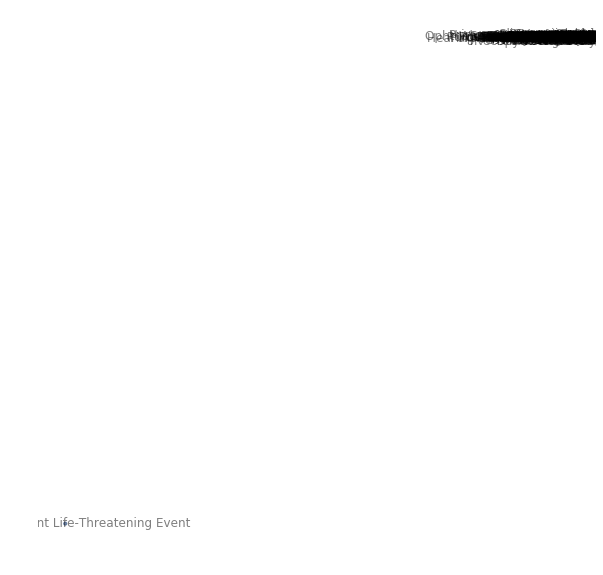

In [39]:
# define the nodes
Gsymp=nx.Graph()
for s in enumerate(symptoms_df['MeSH Symptom Term']):
    Gsymp.add_node(s[1])

# Make a matrix
for i,x in enumerate(overlap_noZeroWeight['symA']):
    if i%5000==0:
        print(i)
    u=overlap_noZeroWeight['symA'].iloc[i,]
    v=overlap_noZeroWeight['symB'].iloc[i,]
    w=overlap_noZeroWeight['weight'].iloc[i,]
    Gsymp.add_weighted_edges_from([(u,v,w)])

#Plot the network
plt.figure(figsize=(10,10))
nx.draw_networkx(Gsymp,
                 pos=nx.spring_layout(Gsymp), # Positions the nodes relative to each other
                 node_size=10, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(Gsymp)),
                 #with_labels=False,
                 alpha=0.5) #The number of shades of color to use.
                 
plt.axis('off')
plt.show()

In [40]:
# Looks like we have one outlier
# I will remove 'Infantile Apparent Life-Threatening Event'

Gsymp.remove_node('Infantile Apparent Life-Threatening Event')

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


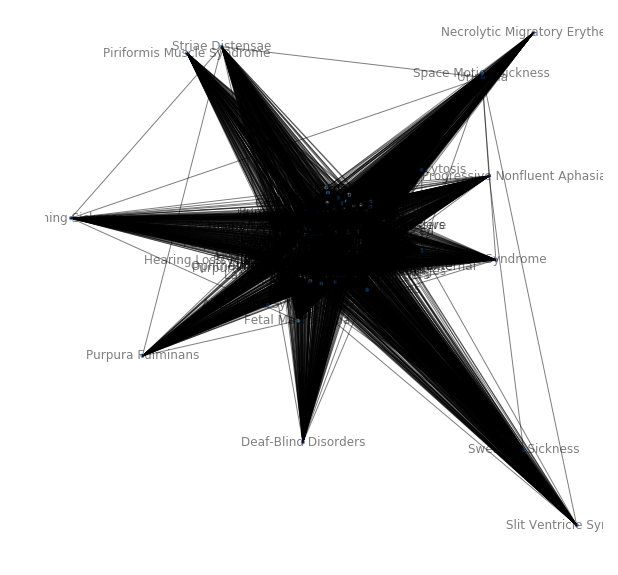

In [41]:
# New plot
plt.figure(figsize=(10,10))
nx.draw_networkx(Gsymp,
                 pos=nx.spring_layout(Gsymp), # Positions the nodes relative to each other
                 node_size=10, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(Gsymp)),
                 #with_labels=False,
                 alpha=0.5) #The number of shades of color to use.
                 
plt.axis('off')
plt.show()

# Analysis
## Which are the biggest nodes, which are the smallest


This graph has 321 nodes and 50293 edges.
Is the graph directed:  False
The median degree is 318.0 and the mean degree is 313.3520249221184.
A symptom node with median degree is connected to 99.06542056074767% of other symptoms.
There is 1 connected component within the graph.


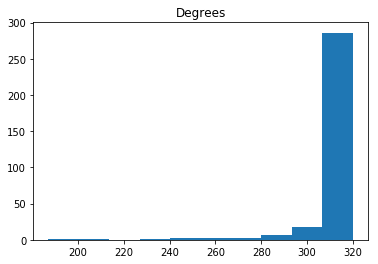

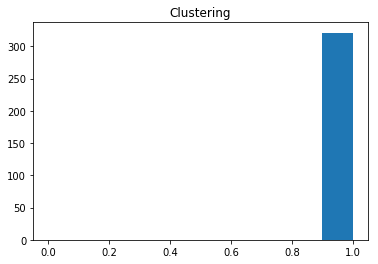

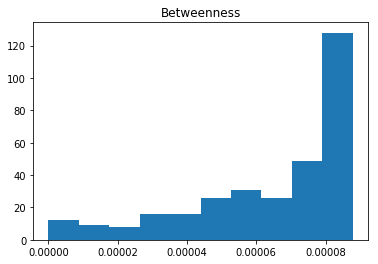

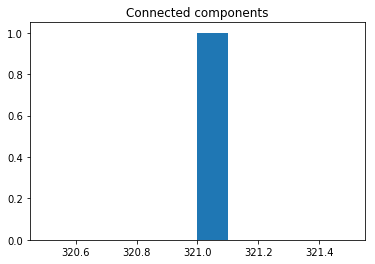

In [42]:
numberofnodes=Gsymp.number_of_nodes()
nodedegrees=[v for k,v in Gsymp.degree()]
av_degree=np.mean(nodedegrees)
med_degree=np.median(nodedegrees)
max_degree=np.max(nodedegrees)
min_degree=np.min(nodedegrees)

clustering=[v for k,v in nx.clustering(Gsymp).items()]

betweenness_cent=list(nx.betweenness_centrality(Gsymp).values())
componentsizes=[len(c) for c in sorted(nx.connected_components(Gsymp), key=len, reverse=True)]

print("This graph has {} nodes and {} edges.".format(Gsymp.number_of_nodes(),Gsymp.number_of_edges()))

# the initial graph after reading the gml file is not directed,
print("Is the graph directed: ",Gsymp.is_directed())

print("The median degree is {} and the mean degree is {}.".format(med_degree,av_degree))

print("A symptom node with median degree is connected to {}% of other symptoms.".format((med_degree/numberofnodes)*100))

print("There is {} connected component within the graph.".format(nx.number_connected_components(Gsymp)))

plt.rcParams['figure.figsize']=[6,4]

plt.hist(nodedegrees)
plt.title('Degrees')
plt.show()

plt.hist(clustering, range =(0,1))
plt.title('Clustering')
plt.show()

plt.hist(betweenness_cent)
plt.title('Betweenness')
plt.show()

plt.hist(componentsizes)
plt.title('Connected components')
plt.show()

We learn that this is as expected a very dense cluster and all symptoms are connected by diseases, except for 'Infantile Apparent Life-Threatening Event' which was removed for plotting reasons.

## What are the nodes with the highest number of degrees?

In [43]:
# highest number of links
degree_seq=sorted(Gsymp.degree(), key=lambda x: x[1], reverse=True)
print('the symptoms with the highest degrees:', degree_seq[0:3])

the symptoms with the highest degrees: [('Body Weight', 320), ('Pain', 320), ('Obesity', 320)]


In [44]:
# lowest number of links
degree_seq=sorted(Gsymp.degree(), key=lambda x: x[1], reverse=False)
print('the symptoms with the lowest degrees:', degree_seq[0:3])

the symptoms with the lowest degrees: [('Piriformis Muscle Syndrome', 187), ('Body Weight Changes', 207), ('Necrolytic Migratory Erythema', 227)]


## What are the nodes with the highest betweenness?

In [45]:
betweenness_seq=sorted(nx.betweenness_centrality(Gsymp).items(), key=lambda x: x[1], reverse=True)
betweenness_seq[0:5]

[('Body Weight', 8.786779281961382e-05),
 ('Pain', 8.786779281961382e-05),
 ('Obesity', 8.786779281961382e-05),
 ('Anoxia', 8.786779281961382e-05),
 ('Mental Retardation', 8.786779281961382e-05)]

In [46]:
betweenness_seq=sorted(nx.betweenness_centrality(Gsymp).items(), key=lambda x: x[1], reverse=False)
betweenness_seq[0:5]

[('Slit Ventricle Syndrome', 0.0),
 ('Piriformis Muscle Syndrome', 1.934545502073636e-07),
 ('Necrolytic Migratory Erythema', 4.007869102294227e-07),
 ('Body Weight Changes', 4.119809037319189e-07),
 ('Sweating Sickness', 2.0349918643555367e-06)]

## What are the densest clusters?

In [47]:
cc_dict={}

for k,v in nx.clustering(Gsymp).items():
    cc_dict[k]=v

In [52]:
import operator
sorted_cc = sorted(cc_dict.items(), key=operator.itemgetter(1))

print('the densest clusters are:')
print(sorted_cc[0:3])

the densest clusters are:
[('Body Weight', 0.9790948275862069), ('Pain', 0.9790948275862069), ('Obesity', 0.9790948275862069)]


In [53]:
print('the least densest clusters are:')
sorted_cc[317:321]

the least densest clusters are:


[('Body Weight Changes', 0.9997185873082876),
 ('Necrolytic Migratory Erythema', 0.9997660909906047),
 ('Piriformis Muscle Syndrome', 0.9998274969811972),
 ('Slit Ventricle Syndrome', 1.0)]

## What are the nodes with the highest and lowest weights?
Adding the weights of all edges that touch a node.

## What are the neighbors with the highest weights?
Or what are the most common other symptoms for Piriformis Muscle Syndrome?

In [63]:
type(Gsymp.adj['Piriformis Muscle Syndrome'])

networkx.classes.coreviews.AtlasView

In [66]:
type(Gsymp.adj['Piriformis Muscle Syndrome'].items())

collections.abc.ItemsView

In [81]:
Weights={}
for n, nbrs in sorted(Gsymp.adj['Piriformis Muscle Syndrome'].items(), reverse=True):
    #print(n,nbrs)
    Weights[n]=nbrs['weight']
# Sort the Weights dictionary
sorted_by_value = sorted(Weights.items(), key=lambda kv: kv[1], reverse=True)
sorted_by_value[0:10]

[('Low Back Pain', 7131),
 ('Sciatica', 2939),
 ('Back Pain', 943),
 ('Pain', 794),
 ('Paralysis', 356),
 ('Paresthesia', 208),
 ('Neuralgia', 205),
 ('Neck Pain', 155),
 ('Muscle Weakness', 146),
 ('Spasm', 116)]

# Results

The data that I have chosen was not really great, because a the network turned out to be only one compound, meaning all nodes are connected to each other. That was unfortunate. But the analysis still returned intresting results. No matter which criterium was used to describe the nodes, the results were very consistent: The nodes 'Body Weight', 'Pain', 'Obesity' are the nodes with the highest number of degrees, betweeness and clustering scores. Indicating that those are the most names symptomes, but also the least specific symptomes. On the other side of the spectru, we still have a high level of connectiity between the nodes. The most specific symptom is 'Piriformis Muscle Syndrome', it is only connected to anoher 187 symptoms, of course this is still very unspecific, however, when taking the additional attribute of the individual edges, the weights, into consideration, it becomes obvious, that the majority of patients are likely to have the symptom and further mention 'low back pain' and 'sciatica'. <br>
As the data in the example is clustered extremly dense, it is essential to consider the weight attribute in all classifications.